In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
pip install chardet


In [21]:
import chardet

with open("/content/Production_Crops_E_Africa.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("/content/Production_Crops_E_Africa.csv", encoding=result['encoding'])


In [22]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,13300.0,F,13300.0,...,40403.0,NaN,49983.0,NaN,50100.0,NaN,43043.0,NaN,35380.0,NaN
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,Fc,4511.0,...,18930.0,Fc,13223.0,Fc,12362.0,Fc,13292.0,Fc,20467.0,Fc
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,6000.0,NaN,6000.0,...,76482.0,NaN,66095.0,NaN,61934.0,NaN,57213.0,NaN,72412.0,NaN
3,4,Algeria,515,Apples,5312,Area harvested,ha,3400.0,F,3100.0,...,41011.0,NaN,46070.0,NaN,44620.0,NaN,39034.0,NaN,32989.0,NaN
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,Fc,45161.0,...,110086.0,Fc,108716.0,Fc,110766.0,Fc,124970.0,Fc,169399.0,Fc


In [23]:
df.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
                 ...   
Y2017F           object
Y2018           float64
Y2018F           object
Y2019           float64
Y2019F           object
Length: 125, dtype: object

In [24]:
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
                ... 
Y2017F          2144
Y2018            892
Y2018F          2035
Y2019            893
Y2019F          1708
Length: 125, dtype: int64

In [25]:
df.dropna(axis =0,inplace =True)

In [26]:
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
               ..
Y2017F          0
Y2018           0
Y2018F          0
Y2019           0
Y2019F          0
Length: 125, dtype: int64

<ipython-input-28-bd612674daa4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

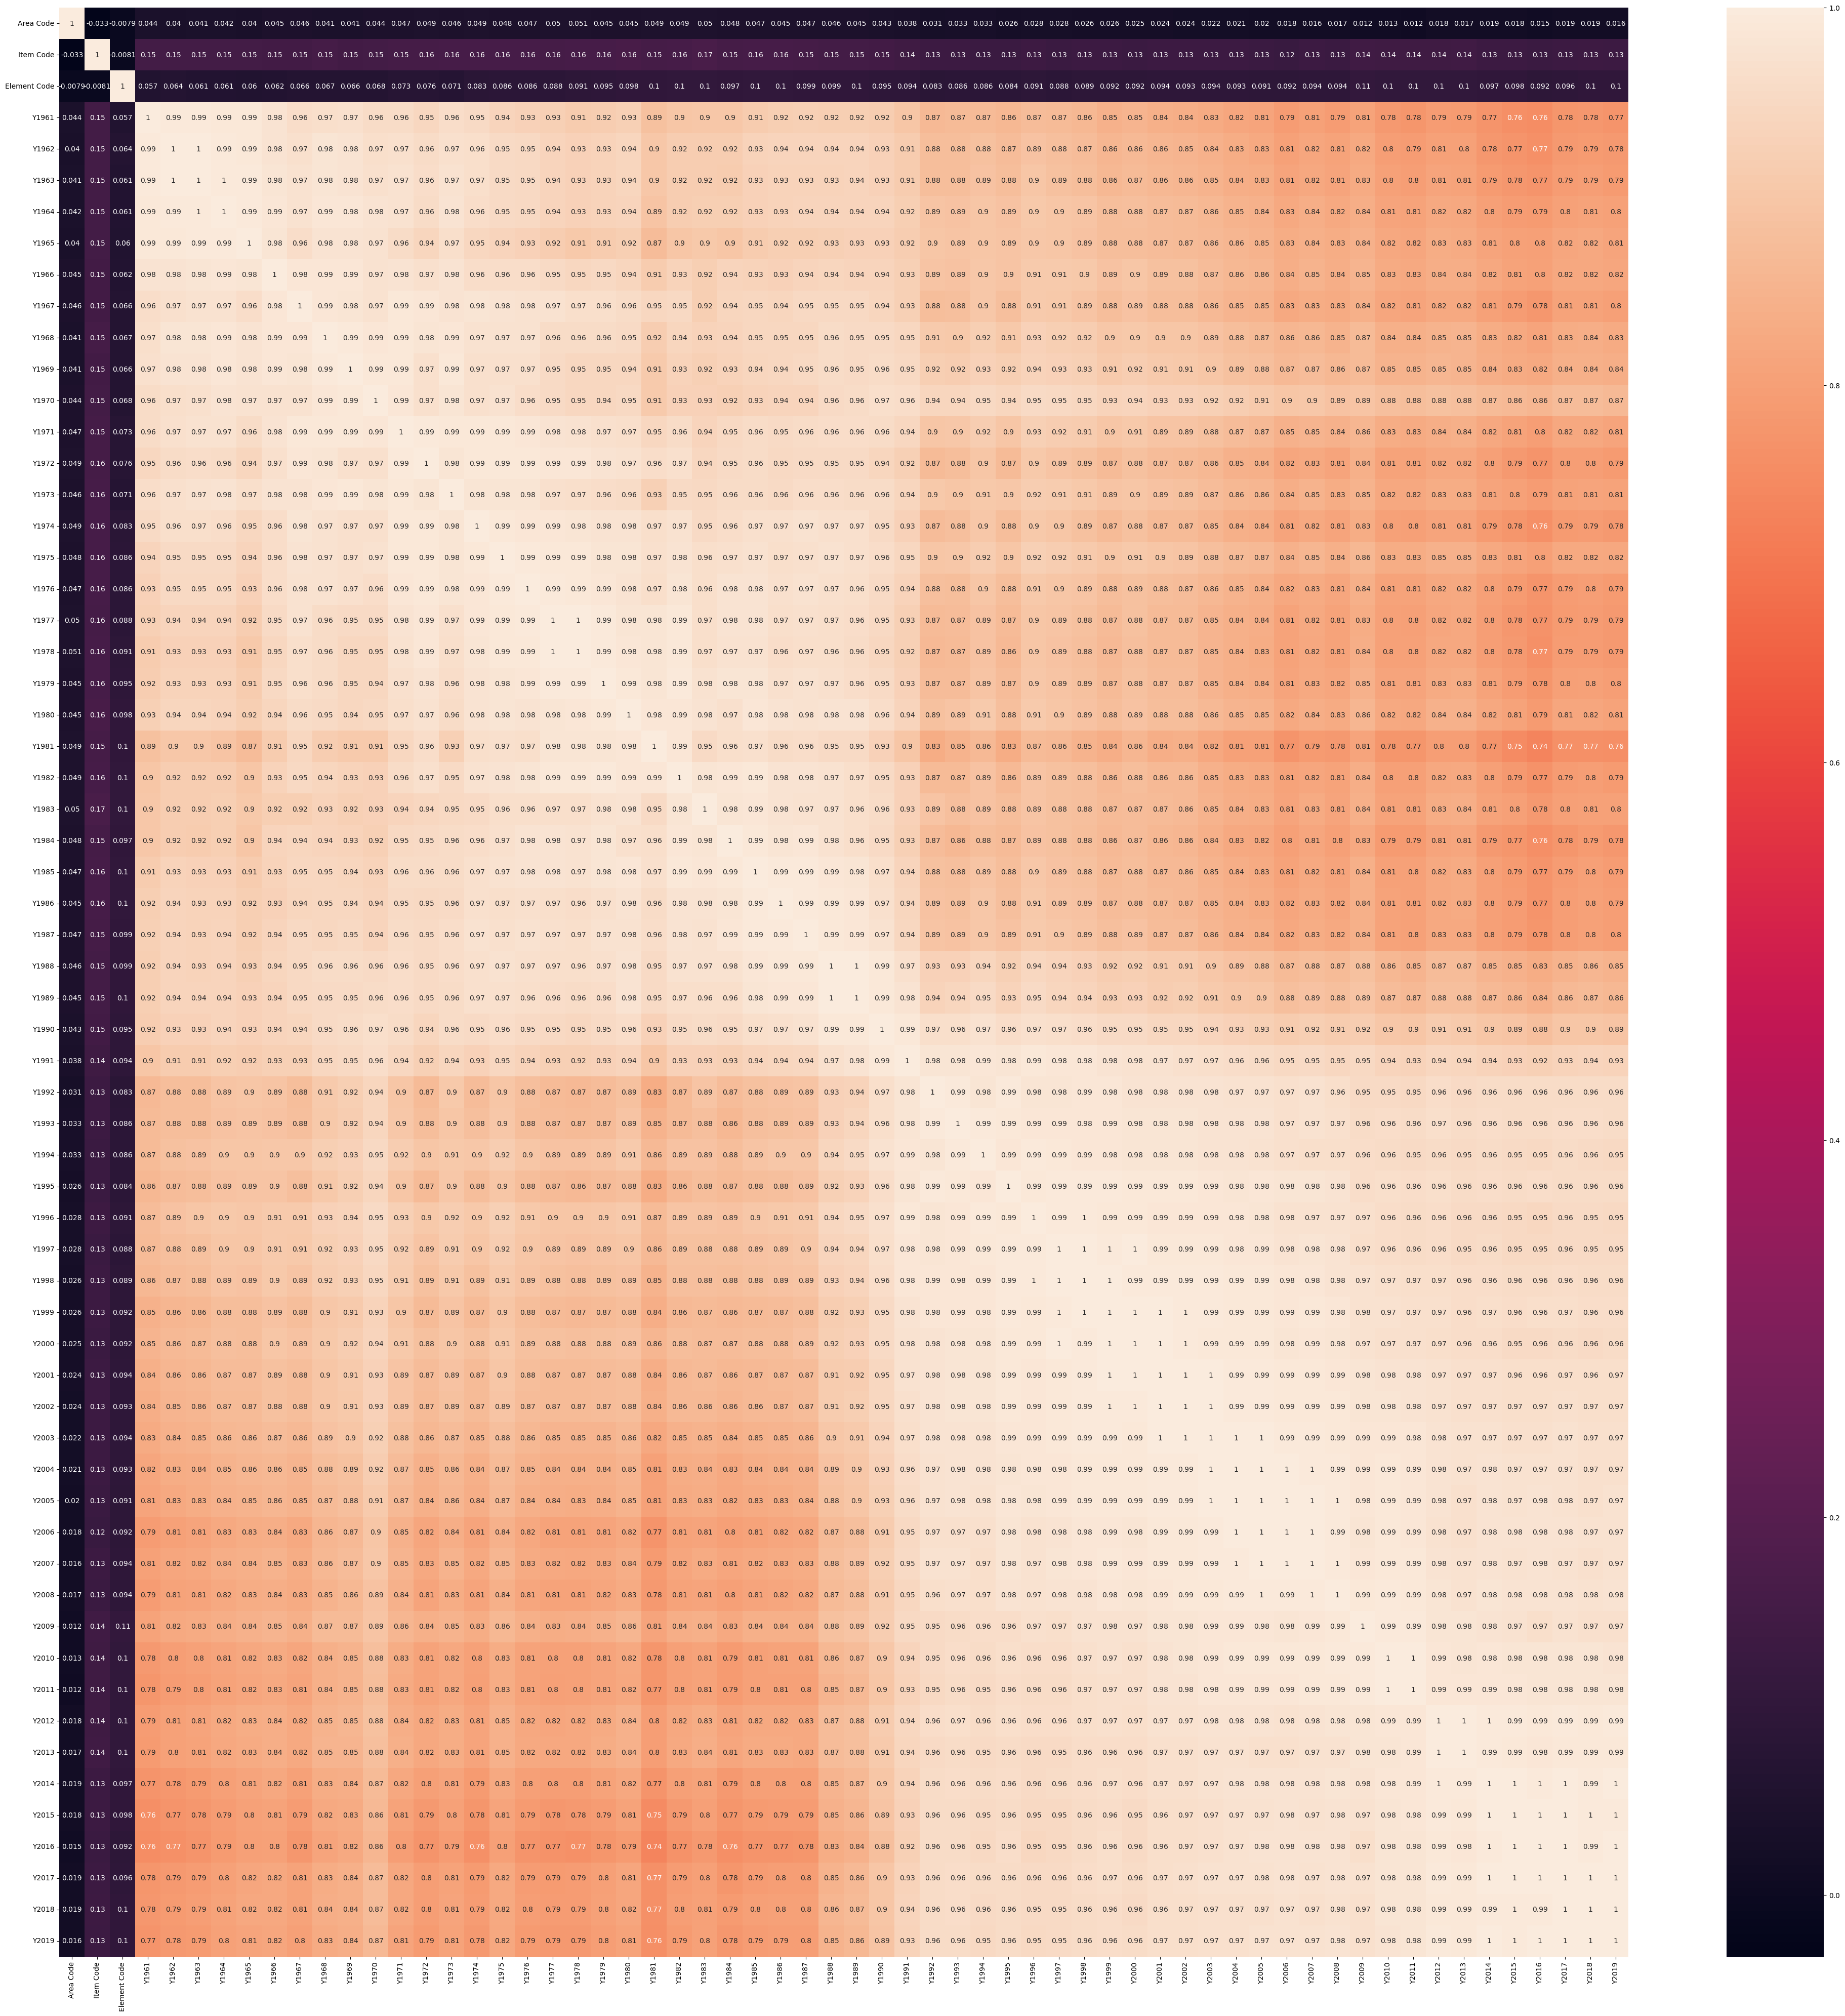

In [28]:
plt.figure(figsize = (50,50))

sns.heatmap(df.corr(),annot = True)

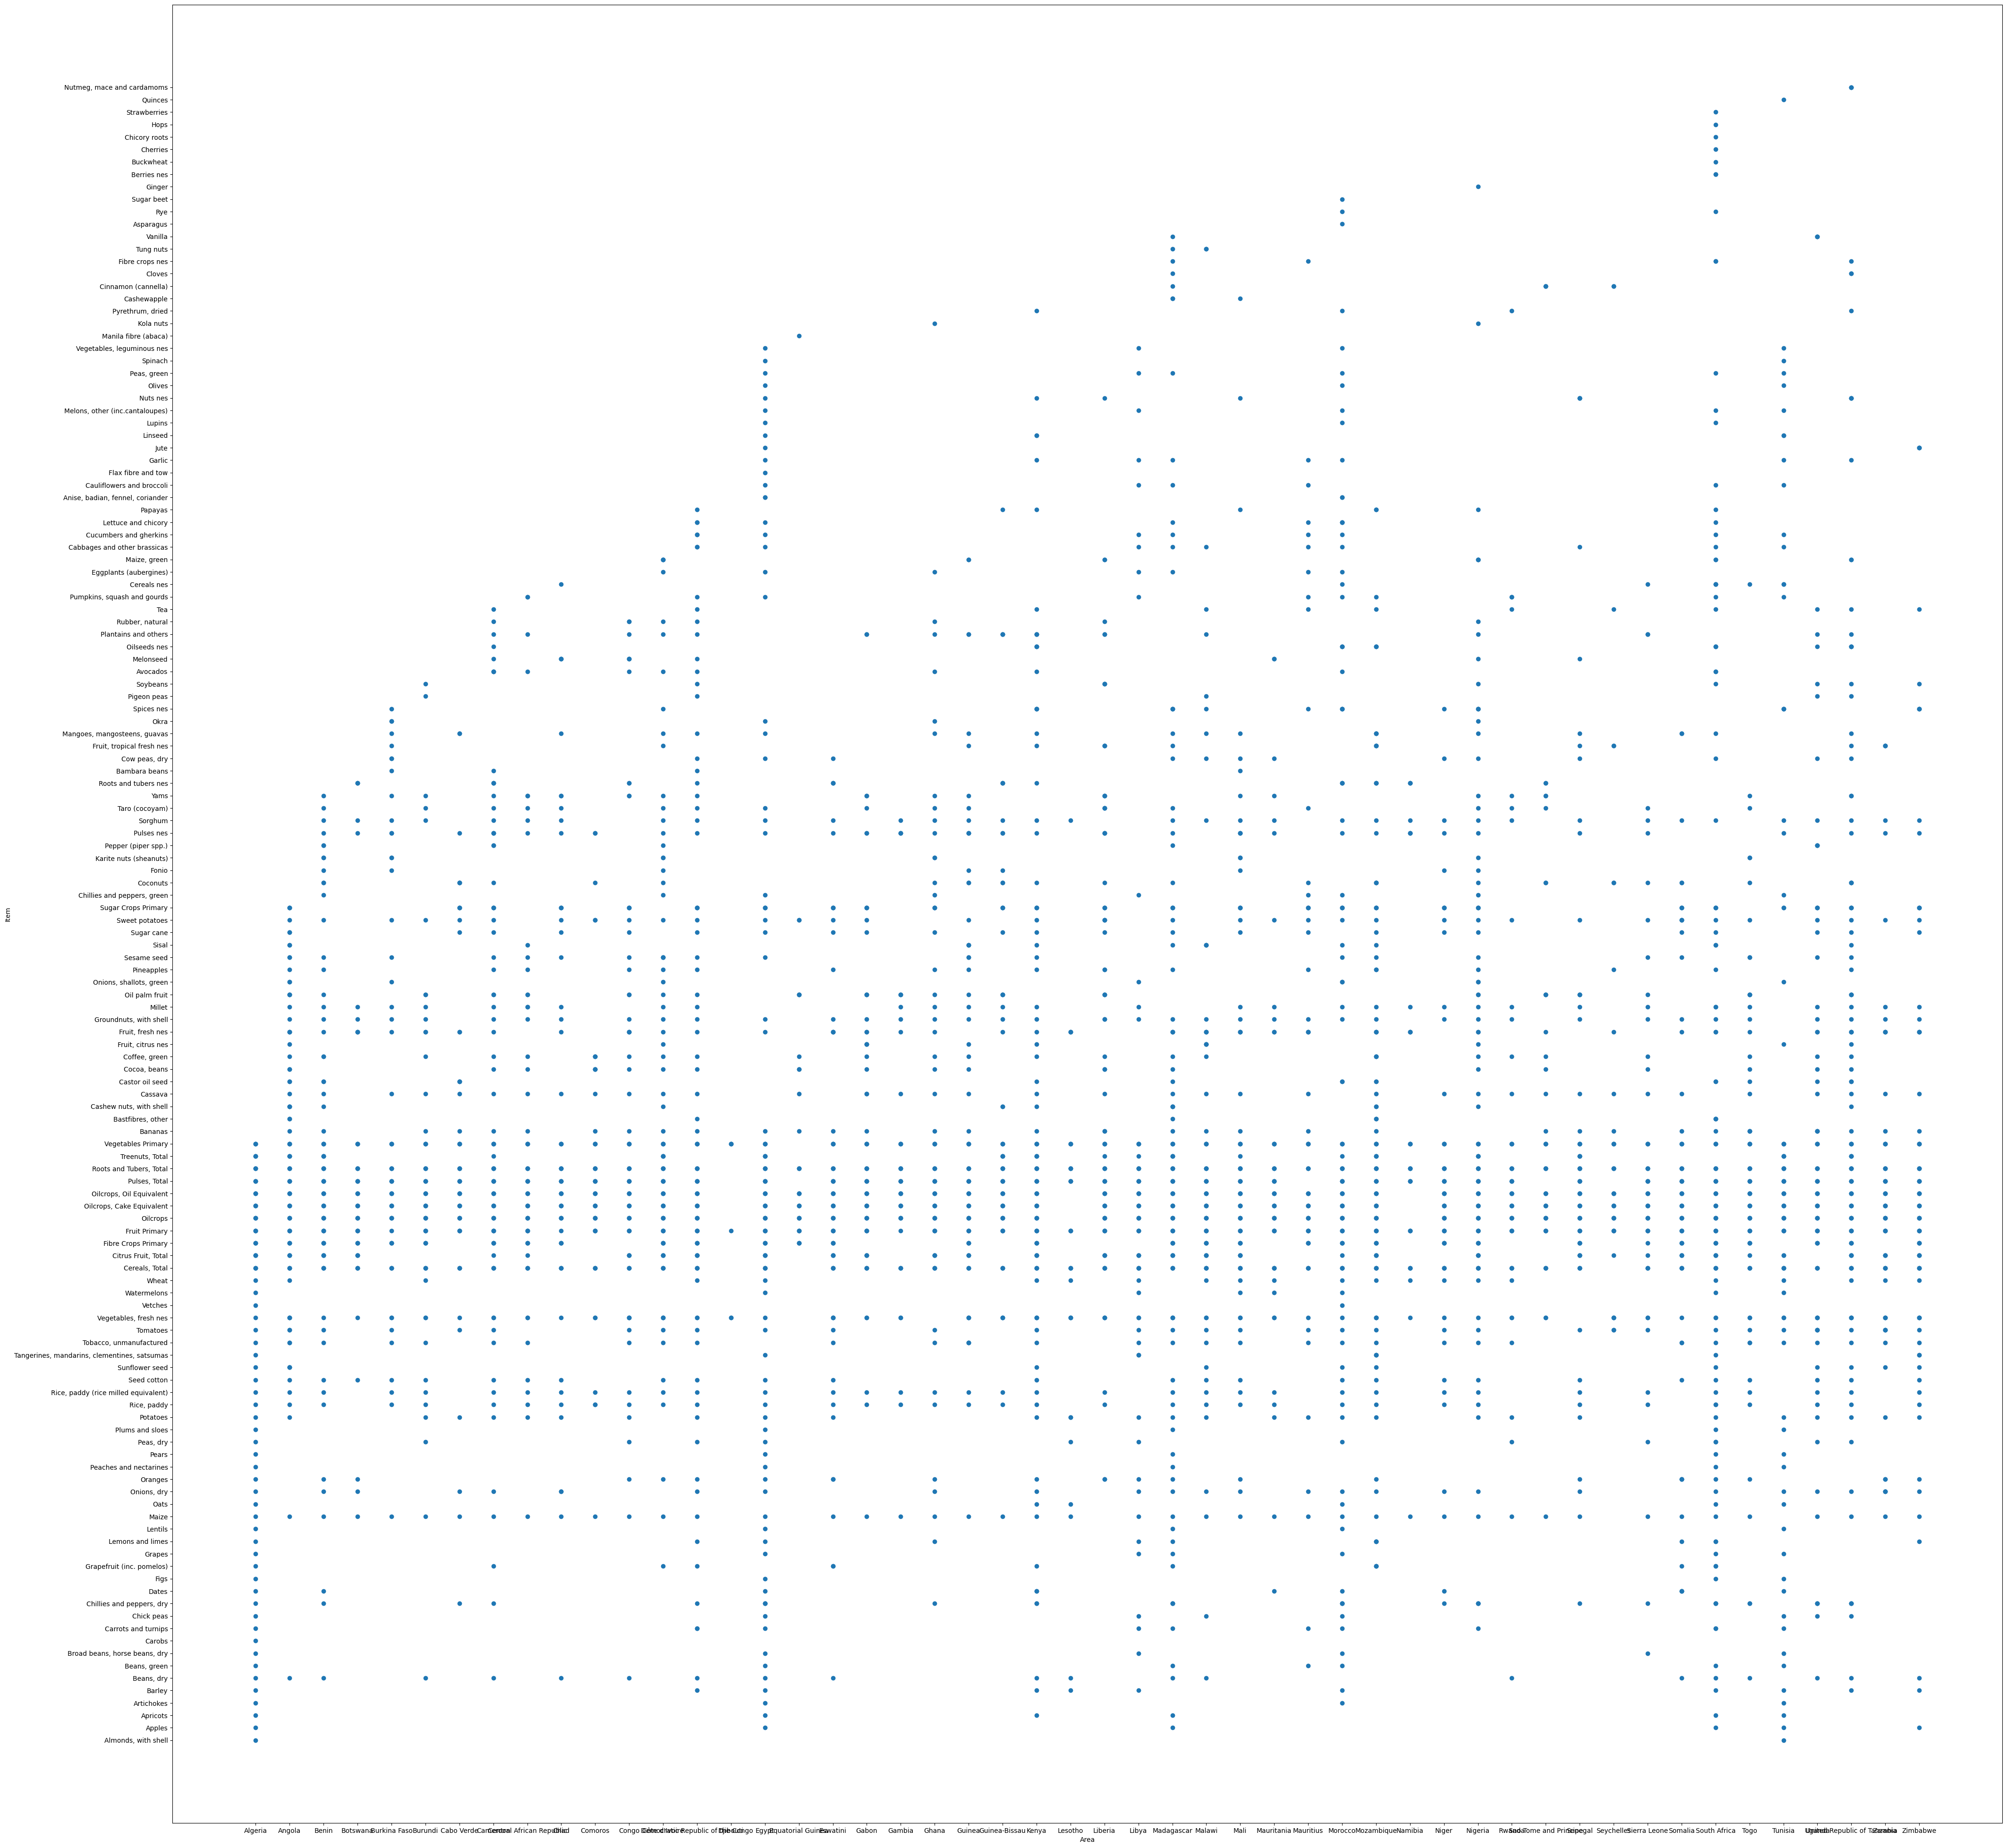

In [30]:
plt.figure(figsize = (50,50))

plt.scatter(df['Area'],df['Item'])

plt.xlabel("Area")
plt.ylabel("Item")
plt.show()

In [36]:
import tensorflow as tf

In [39]:
from tensorflow import keras

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
l = LabelEncoder()

In [42]:
for i in df.columns:
  if df[i].dtypes == "object":
    df[i] = l.fit_transform(df[i])

In [43]:
df.dtypes

Area Code         int64
Area              int64
Item Code         int64
Item              int64
Element Code      int64
                 ...   
Y2017F            int64
Y2018           float64
Y2018F            int64
Y2019           float64
Y2019F            int64
Length: 125, dtype: object

In [45]:
x = df.drop('Element',axis = 1)
y =df['Element']

In [49]:
x

,Area Code,Area,Item Code,Item,Element Code,Unit,Y1961,Y1961F,Y1962,Y1962F,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,4,0,221,0,5312,0,13300.0,2,13300.0,2,...,40403.0,6,49983.0,6,50100.0,6,43043.0,6,35380.0,6
1,4,0,221,0,5419,1,4511.0,3,4511.0,3,...,18930.0,3,13223.0,3,12362.0,3,13292.0,3,20467.0,3
2,4,0,221,0,5510,2,6000.0,5,6000.0,5,...,76482.0,6,66095.0,6,61934.0,6,57213.0,6,72412.0,6
3,4,0,515,2,5312,0,3400.0,2,3100.0,2,...,41011.0,6,46070.0,6,44620.0,6,39034.0,6,32989.0,6
4,4,0,515,2,5419,1,45294.0,3,45161.0,3,...,110086.0,3,108716.0,3,110766.0,3,124970.0,3,169399.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,181,56,1729,146,5419,1,NaN,5,NaN,5,...,16680.0,3,17493.0,3,18038.0,3,18579.0,3,19122.0,3
9087,181,56,1729,146,5510,2,NaN,1,NaN,1,...,6849.0,1,6588.0,1,6490.0,1,6592.0,1,6643.0,1
9088,181,56,1735,150,5312,0,12296.0,1,12644.0,1,...,34067.0,1,34443.0,1,34937.0,1,35467.0,1,35994.0,1
9089,181,56,1735,150,5419,1,65324.0,3,65900.0,3,...,66483.0,3,66788.0,3,66951.0,3,67043.0,3,67141.0,3


In [83]:
y

0       0
1       2
2       1
3       0
4       2
       ..
9086    2
9087    1
9088    0
9089    2
9090    1
Name: Element, Length: 9091, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size= 0.3,random_state = 1)

In [48]:
from keras import Sequential

In [88]:
model = Sequential([
    keras.layers.Dense(units = 200,input_dim = 124,activation = 'relu'),
    keras.layers.Dense(units = 100,activation = 'relu'),
    keras.layers.Dense(units = 50,activation = 'relu'),
    keras.layers.Dense(units = 1,activation = 'sigmoid')
])

In [85]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [89]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


clip_value = 1.0


def clip_grad_norm(grad, clip_value):
    return K.clip(grad, -clip_value, clip_value)


custom_optimizer = Adam(clipnorm=clip_value)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [90]:
h = model.fit(x_train,y_train,epochs = 100,batch_size = 128,validation_split = 0.3)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


35/35 [==============================] - 2s 17ms/step - loss: nan - accuracy: 0.3433 - val_loss: nan - val_accuracy: 0.3033


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.3426 - val_loss: nan - val_accuracy: 0.3033
Epoch 9/100
35/35 [==============================] - 0s

In [91]:
loss,acc = model.evaluate(x_test,y_test)
print("testing accuracy {}".format(acc*100))

86/86 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3398
testing accuracy 33.9809387922287


In [92]:
loss,acc = model.evaluate(x_train,y_train)
print("training accuracy {}".format(acc*100))

199/199 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3308
training accuracy 33.08188021183014


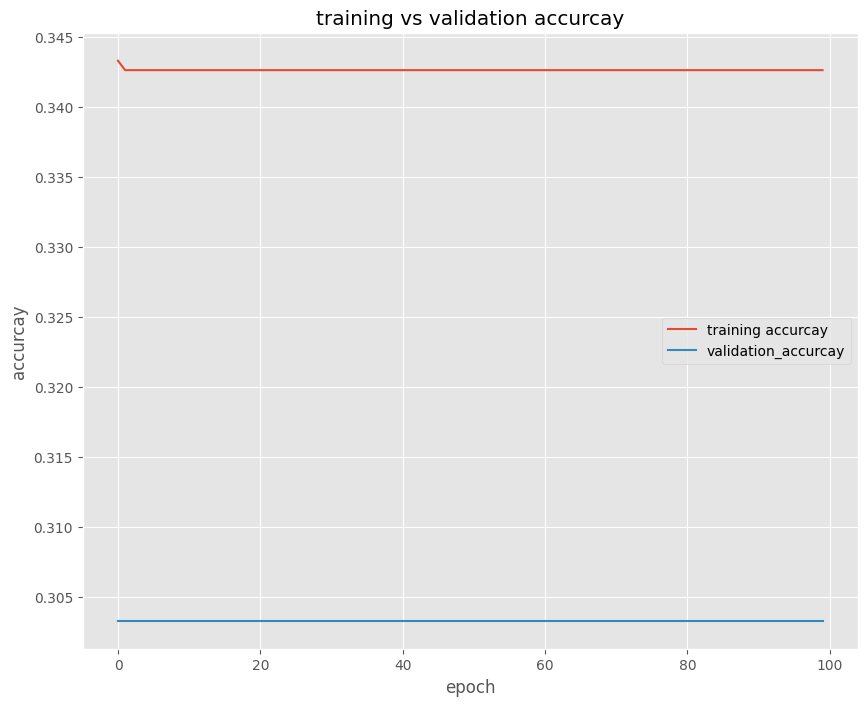

In [95]:
epoch= np.arange(0,len(h.history['loss']))
plt.figure(figsize = (10,8))

plt.style.use("ggplot")

plt.plot(epoch,h.history["accuracy"],label = "training accurcay")
plt.plot(epoch,h.history["val_accuracy"],label = "validation_accurcay")

plt.title("training vs validation accurcay")
plt.xlabel("epoch")
plt.ylabel("accurcay")
plt.legend()